#  Machines (Active Learning) + Expert Annotation 
## (MULT-predicate document screening)

In [1]:
import pandas as pd

%matplotlib inline  
import matplotlib.pyplot as plt

In [33]:
def plot_charts(df, metrics, algos, pred):
    fig, ax = plt.subplots(nrows=2, ncols=2, gridspec_kw = {'width_ratios':[1, 1]}, figsize=(20,12))
    x = df.loc[df['sampling_strategy'] == algos[0]]['num_items_queried'].values
    
    for i, m in zip([(0, 0), (0, 1), (1, 0), (1, 1)], metrics):
        for alg, c, l in zip(algos, ['m', 'b', 'black'], ['--', '-.', '-']):
            y = df.loc[df['sampling_strategy'] == alg][m+'_mean'].values
            y_std = df.loc[df['sampling_strategy'] == alg][m+'_std'].values
            ax[i].plot(x, y, label=alg, color=c, linestyle=l)
            ax[i].fill_between(x, y-y_std, y+y_std, alpha=0.05, color=c)
            ax[i].set_xlabel('number of queried items', size=14)
            ax[i].set_ylabel(m, size=14)
            ax[i].set_title('{} on predicates {}+{}'.format(m, pred[0],pred[1]), size=15)
        # clasifiers with all data
#         y_ = df.loc[df['sampling_strategy'] == 'all_training_data'][m+'_mean'].values[0]
#         ax[i].axhline(y=y_, linestyle=':', label='all_training_data')
        ax[i].legend( fontsize=14)
            
def plot(file_name, pred):
    plot_charts(pd.read_csv('../output/machines_and_experts/{}'.format(file_name)),
                ['loss', 'f_beta', 'precision', 'recall'], 
                ['uncertainty_sampling', 'random_sampling', 'objective_aware_sampling'],
                pred)

# AMAZON-SENTIMENT DATASET

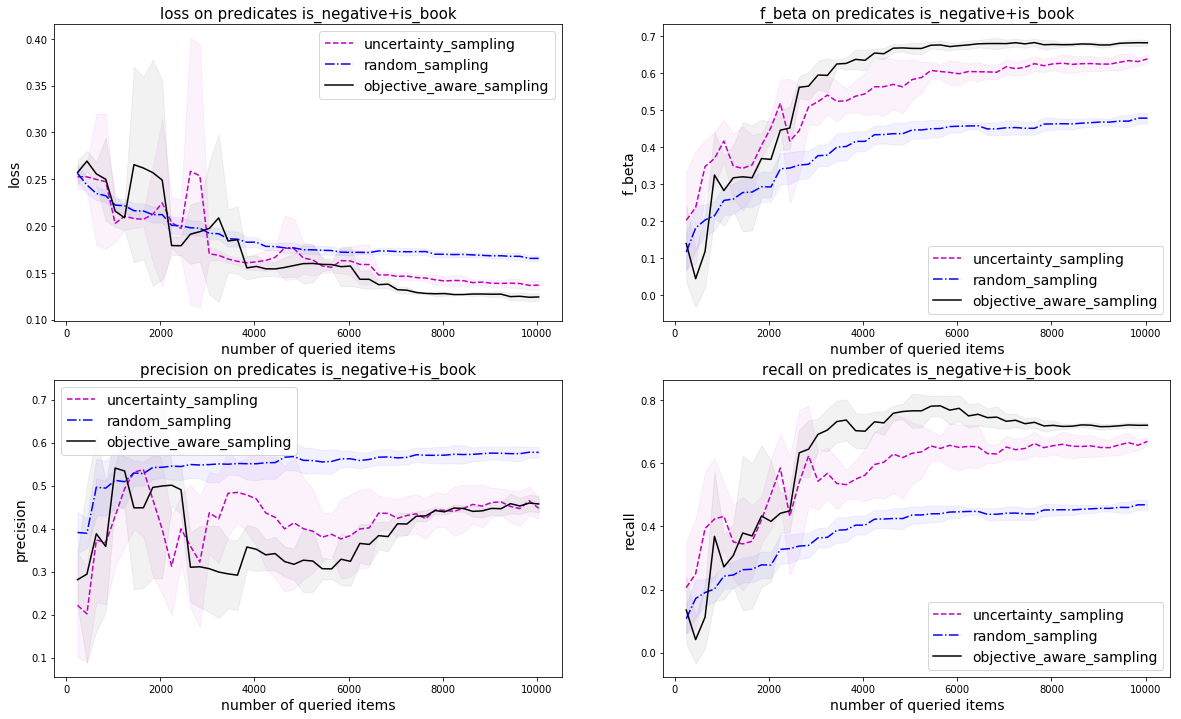

In [39]:
pred = ['is_negative', 'is_book']
file_name = 'screening_amazon_thr07.csv'
plot(file_name, pred)

# OHSUMED-BASED SCREENING DATASET

## Predicates C04 + C12
C14: Neoplasms, selectivity = 0.18 <br>
C12: Urologic and Male Genital Diseases, selectivity = 0.07

The proportion of documents that describe C04+C14 is 1.6%, the total number of documents is 34.4k <br>

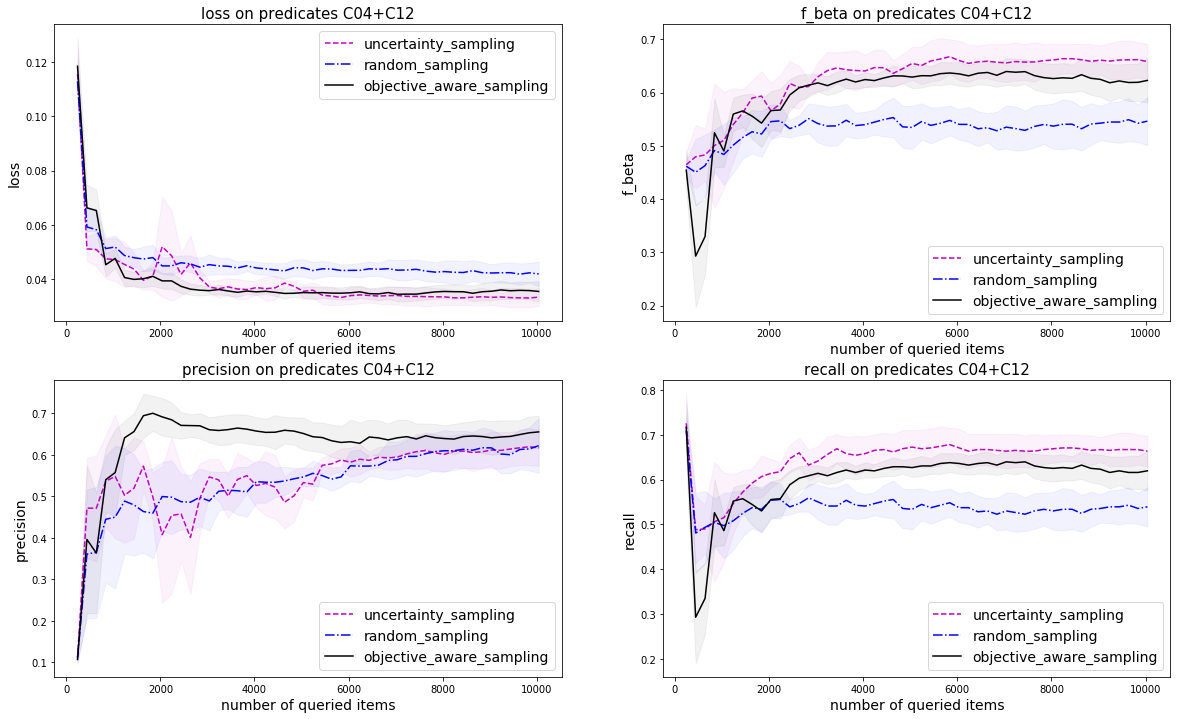

In [42]:
pred = ['C04', 'C12']
file_name = 'screening_ohsumed_C04_C12_thr07.csv'
plot(file_name, pred)

# Loneliness SLR dataset

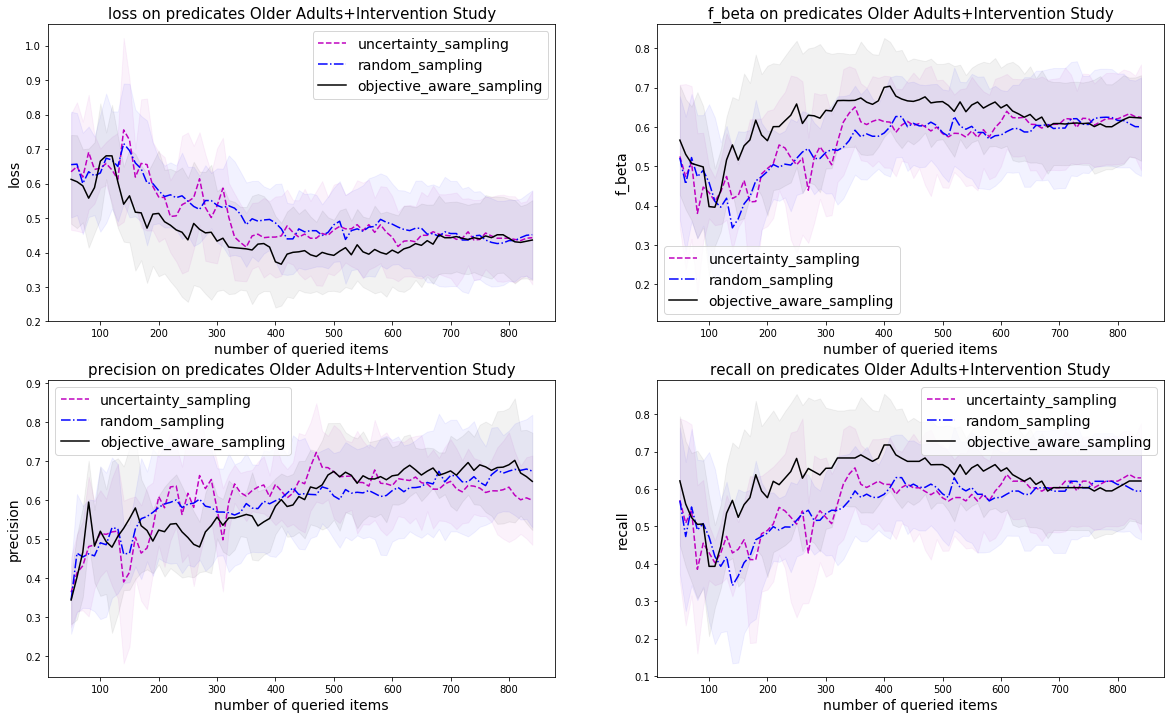

In [43]:
pred = ['Older Adults', 'Intervention Study']
file_name = 'loneliness-dataset-2018_thr07.csv'
plot(file_name, pred)